In [ ]:
Completion of the Medical Data Project on FreeCodeCamp

In [1]:
#Importing in the necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
#Setting the SNS style and reading the csv

sns.set_style("darkgrid")
df = pd.read_csv(r"C:\Users\HP\Desktop\Python Projects\boilerplate-medical-data-visualizer\medical_examination.csv")

In [3]:
# Creating a column of overweight subjects using the weight and the height column by writing a function for the BMI
bmi = round(df['weight']/(df['height']/100)**2, 2)
df['overweight'] = bmi.apply(lambda x: 1 if x > 25 else 0)

In [4]:
#Normalizing the data: cholesterol
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)

In [5]:
#Mormalizing the data: low or high glucose 
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)

In [6]:
#Melting the data 
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat.columns = df_cat.columns.str.split('_', expand=True)

In [7]:
#Printing out the first 5 rows to doublecheck the data
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [8]:
#Creating the dataset for a heat map
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))]

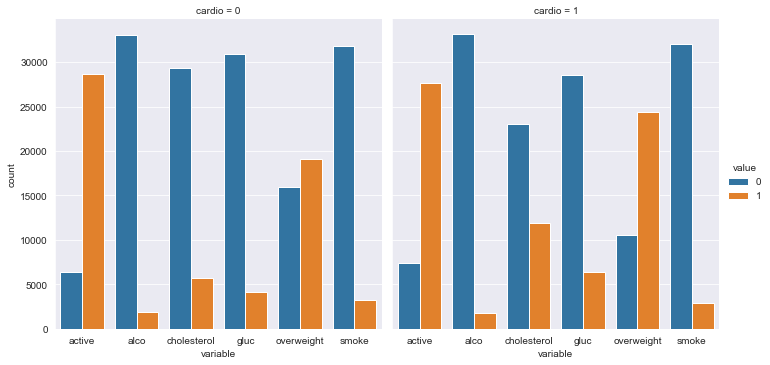

In [23]:
#Bar chart to look at the difference between those who does cardio and those who do not 
cat_plot = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")
cat_plot.set_axis_labels("variable", "total")
fig = cat_plot.fig
# the help you needed!  https://forum.freecodecamp.org/t/medical-data-visualizer-confusion/410074/39

In [11]:
#df_heat = df_heat.astype('float64')--- not necessary 

In [12]:
#Looking at the correlation 
corr = df_heat.corr()

In [13]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [14]:
mask = np.triu(np.ones_like(corr, dtype=bool))

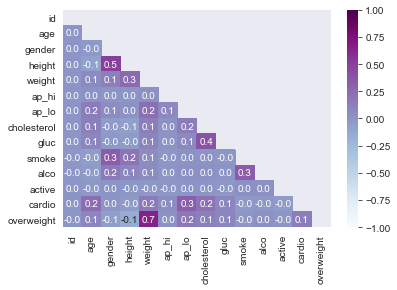

In [15]:
#Printing out the heatmap 
tri_heatmap = sns.heatmap(corr, mask = mask, cmap="BuPu", vmax=1, vmin=-1, center = 0, annot=True,fmt='.1f')
#tri_heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=12); setting the title makes it fail


In [17]:
# Was failing the test because heat values were not the same: need to change it to this: 
#https://stackoverflow.com/questions/63317760/seaborns-heatmap-when-annot-true-displays-0-instead-of-0-0-how-do-i-change-th

#sns.heatmap(df, annot=True,fmt='.1f')

In [18]:
## Now failing the test because it cannot read the x & y labels 
#https://shantoroy.com/python/python-bar-chart-using-matplotlib/
# Fixed it: https://forum.freecodecamp.org/t/medical-data-visualizer-confusion/410074/39